In [1]:
import pandas as pd
col_names = ["pregnant","glucose","bp", "skin", "insulin", "bmi", "pedigree", "age", "label"]
pima = pd.read_csv(r"C:\Users\PcSrv\Documents\Python Scripts\Datasets\diabetes.csv", header = None, names = col_names)

In [2]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [3]:
pima = pima.tail(-1)

In [4]:
print(pima.dtypes)

pregnant    object
glucose     object
bp          object
skin        object
insulin     object
bmi         object
pedigree    object
age         object
label       object
dtype: object


In [5]:
pima["pregnant"]= pd.to_numeric(pima["pregnant"])

In [6]:
feature_cols = ["pregnant", "insulin", "bmi", "age"]
x = pima[feature_cols]
y = pima.label

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [8]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver= "liblinear")
logreg.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [9]:
print(pima.dtypes)

pregnant     int64
glucose     object
bp          object
skin        object
insulin     object
bmi         object
pedigree    object
age         object
label       object
dtype: object


In [10]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [11]:
y_pred_class = logreg.predict(x_test)

In [12]:
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_pred_class))

0.6927083333333334


In [13]:
y_test.value_counts()

label
0    130
1     62
Name: count, dtype: int64

In [14]:
print ("True :", y_test.values[0:25])
print ("Pred :", y_pred_class[0:25])       

True : ['1' '0' '0' '1' '0' '0' '1' '1' '0' '0' '1' '1' '0' '0' '0' '0' '1' '0'
 '0' '0' '1' '1' '0' '0' '0']
Pred : ['0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0' '1' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0']


In [15]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[118  12]
 [ 47  15]]


In [16]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0,0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [17]:
print((TP+TN)/(TP+ TN + FP+ FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.6927083333333334
0.6927083333333334


In [18]:
print((FP + FN)/(TP+ TN+ FP+ FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.3072916666666667
0.30729166666666663


In [19]:
print(TP/(TP + FN))
print(metrics.recall_score(y_test, y_pred_class, pos_label = "1"))

0.24193548387096775
0.24193548387096775


In [20]:
print(TN/ (TN + FP))

0.9076923076923077


In [21]:
print(FP/ (FP + TN))

0.09230769230769231


In [22]:
print(TP/ (TP + FP))
print(metrics.precision_score(y_test, y_pred_class, pos_label = "1"))

0.5555555555555556
0.5555555555555556


In [23]:
logreg.predict(x_test)[0:10]

array(['0', '0', '0', '0', '0', '0', '0', '1', '0', '1'], dtype=object)

In [24]:
logreg.predict_proba(x_test)[0:10, :]

array([[0.63247571, 0.36752429],
       [0.71643656, 0.28356344],
       [0.71104114, 0.28895886],
       [0.5858938 , 0.4141062 ],
       [0.84103973, 0.15896027],
       [0.82934844, 0.17065156],
       [0.50110974, 0.49889026],
       [0.48658459, 0.51341541],
       [0.72321388, 0.27678612],
       [0.32810562, 0.67189438]])

In [25]:
logreg.predict_proba(x_test)[0:10, 1]

array([0.36752429, 0.28356344, 0.28895886, 0.4141062 , 0.15896027,
       0.17065156, 0.49889026, 0.51341541, 0.27678612, 0.67189438])

In [26]:
y_pred_prob = logreg.predict_proba(x_test)[:, 1]

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

Text(0, 0.5, 'Frequency')

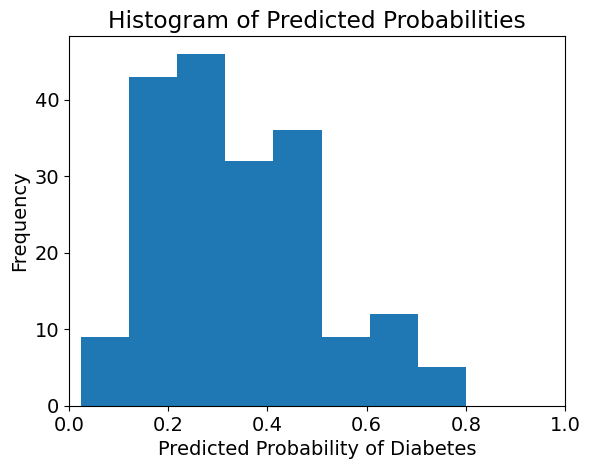

In [28]:
plt.hist(y_pred_prob, bins = 8)
plt.xlim(0,1)
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability of Diabetes')
plt.ylabel('Frequency')

In [29]:
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], threshold=0.3)[0]

In [30]:
y_pred_prob[0:10]

array([0.36752429, 0.28356344, 0.28895886, 0.4141062 , 0.15896027,
       0.17065156, 0.49889026, 0.51341541, 0.27678612, 0.67189438])

In [31]:
y_pred_class[0:10]

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 1.])

In [32]:
print (confusion)

[[118  12]
 [ 47  15]]


In [58]:
y_test = pd.to_numeric(y_test)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[80 50]
 [16 46]]


# Sensitivity

In [59]:
print(46/(46+ 16))

0.7419354838709677


# Specificity

In [60]:
print( 80/ (80+ 50))

0.6153846153846154


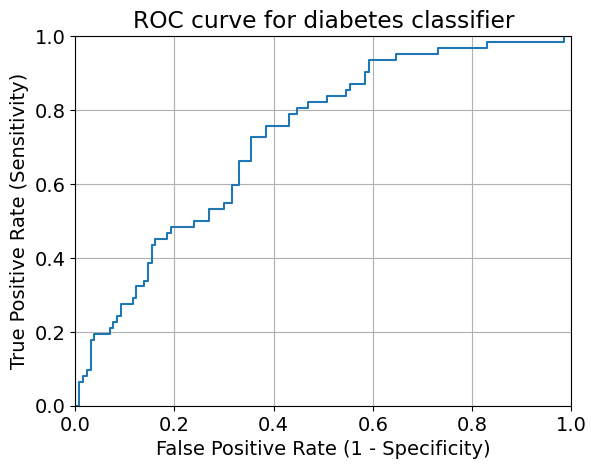

In [61]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [62]:
def evaluate_threshold(threshold):
    print ('Sensitivity:', tpr[thresholds > threshold][-1])
    print ('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [63]:
evaluate_threshold(0.5)

Sensitivity: 0.24193548387096775
Specificity: 0.9076923076923077


In [64]:
evaluate_threshold(0.3)

Sensitivity: 0.7258064516129032
Specificity: 0.6153846153846154


In [65]:
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.7245657568238213


In [66]:
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, x, y, cv =10, scoring = 'roc_auc').mean()

0.7378233618233618